# Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis on the competition dataset. We focus on:
1.  **Feature Interpretation**: Understanding the anonymized feature groups.
2.  **Missing Values & Outliers**: Identifying and visualizing data quality issues.
3.  **Data Distributions**: Visualizing the spread of features and target variables.

## 1. Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
data_path = '../data/hull-tactical-market-prediction/train_2007_2025.csv'
df = pd.read_csv(data_path)

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (4625, 98)


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,0,0,-1,0,0,0,...,0.488757,0.270503,1.583371,0.283069,-1.198303,0.000661,NaN,-0.004830,0.000191,-0.005332
1,1,0,0,0,0,0,-1,0,0,0,...,0.488095,0.424603,1.135931,0.283730,-1.077745,0.000661,NaN,-0.003033,0.000190,-0.003535
2,2,0,0,0,0,0,-1,0,0,0,...,0.613757,0.409392,0.552773,0.284392,-1.029581,0.000661,NaN,0.007682,0.000190,0.007180
3,3,0,0,0,0,0,-1,0,0,0,...,0.703704,0.435185,0.394375,0.285053,-1.093724,0.000661,NaN,0.008303,0.000189,0.007802
4,4,0,0,0,0,0,-1,0,0,0,...,0.779101,0.433201,0.756670,0.285714,-1.174422,0.000661,NaN,0.001198,0.000189,0.000697


## 2. Feature Interpretation

The features are anonymized but grouped by prefixes:
- **S**: Sentiment
- **E**: Economic
- **P**: Price
- **I**: Interest Rates
- **M**: Market (?)
- **V**: Volatility (?)
- **D**: Date/Time related (?)

Let's count the features in each group.

In [3]:
feature_groups = {}
for col in df.columns:
    prefix = col[0]
    if prefix not in feature_groups:
        feature_groups[prefix] = []
    feature_groups[prefix].append(col)

print("Feature Groups:")
for prefix, features in sorted(feature_groups.items()):
    print(f"  {prefix}: {len(features)} features (e.g., {features[:3]})")

Feature Groups:
  D: 9 features (e.g., ['D1', 'D2', 'D3'])
  E: 20 features (e.g., ['E1', 'E10', 'E11'])
  I: 9 features (e.g., ['I1', 'I2', 'I3'])
  M: 18 features (e.g., ['M1', 'M10', 'M11'])
  P: 13 features (e.g., ['P1', 'P10', 'P11'])
  S: 12 features (e.g., ['S1', 'S10', 'S11'])
  V: 13 features (e.g., ['V1', 'V10', 'V11'])
  d: 1 features (e.g., ['date_id'])
  f: 1 features (e.g., ['forward_returns'])
  m: 1 features (e.g., ['market_forward_excess_returns'])
  r: 1 features (e.g., ['risk_free_rate'])


## 3. Missing Values Analysis

We visualize the missing values to understand if there are systematic gaps (e.g., specific time periods or specific features).

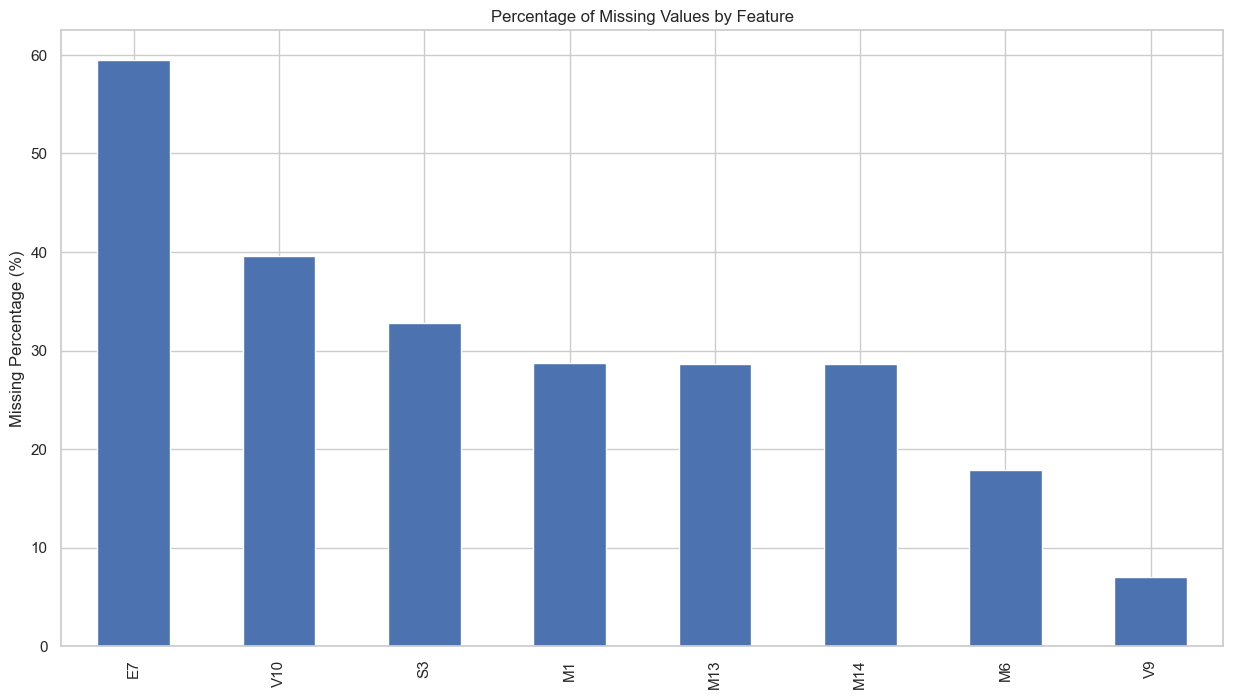

In [4]:
# Calculate missing percentage
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_pct = (missing / len(df)) * 100

plt.figure(figsize=(15, 8))
missing_pct.sort_values(ascending=False).plot(kind='bar')
plt.title("Percentage of Missing Values by Feature")
plt.ylabel("Missing Percentage (%)")
plt.xticks(rotation=90)
plt.show()

### Missing Value Heatmap
This helps identify if missing values are correlated across features or time.

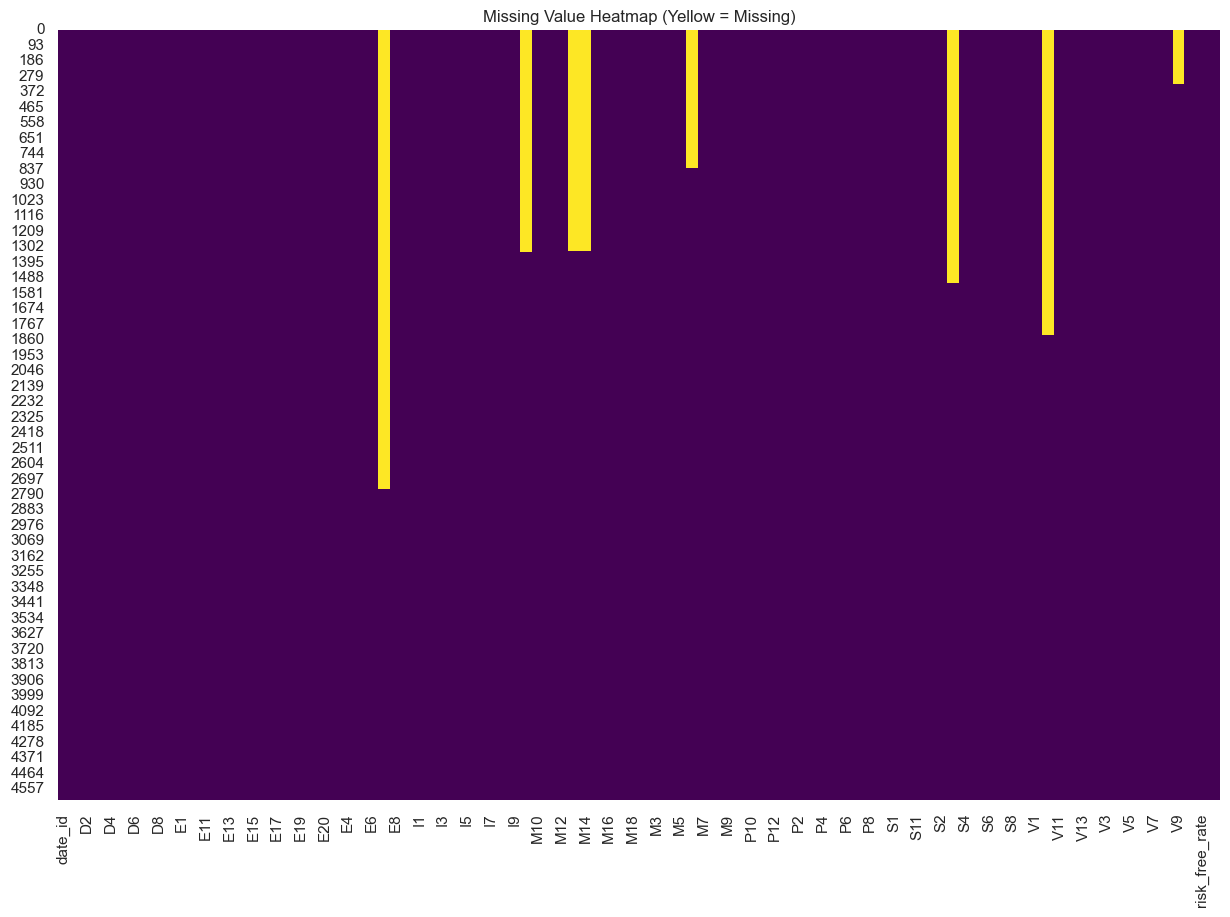

In [5]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap (Yellow = Missing)")
plt.show()

## 4. Outlier Detection

We use boxplots to visualize the distribution and outliers for a representative feature from each group.

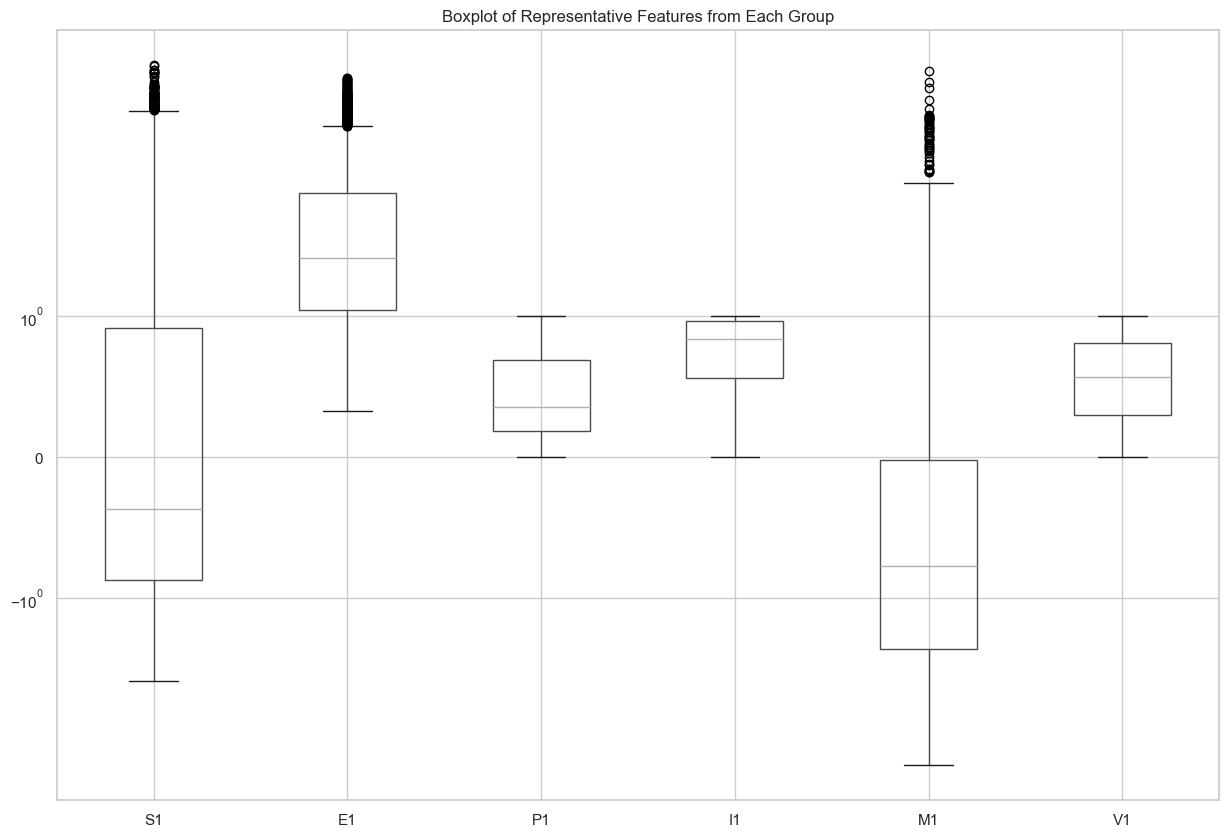

In [6]:
groups_to_plot = ['S', 'E', 'P', 'I', 'M', 'V']
cols_to_plot = []

for g in groups_to_plot:
    if g in feature_groups and feature_groups[g]:
        # Pick the first feature from each group
        cols_to_plot.append(feature_groups[g][0])

plt.figure(figsize=(15, 10))
df[cols_to_plot].boxplot()
plt.title("Boxplot of Representative Features from Each Group")
plt.yscale('symlog') # Use symlog to handle potentially large scales
plt.show()

## 5. Data Distributions

Let's look at the histograms of these representative features.

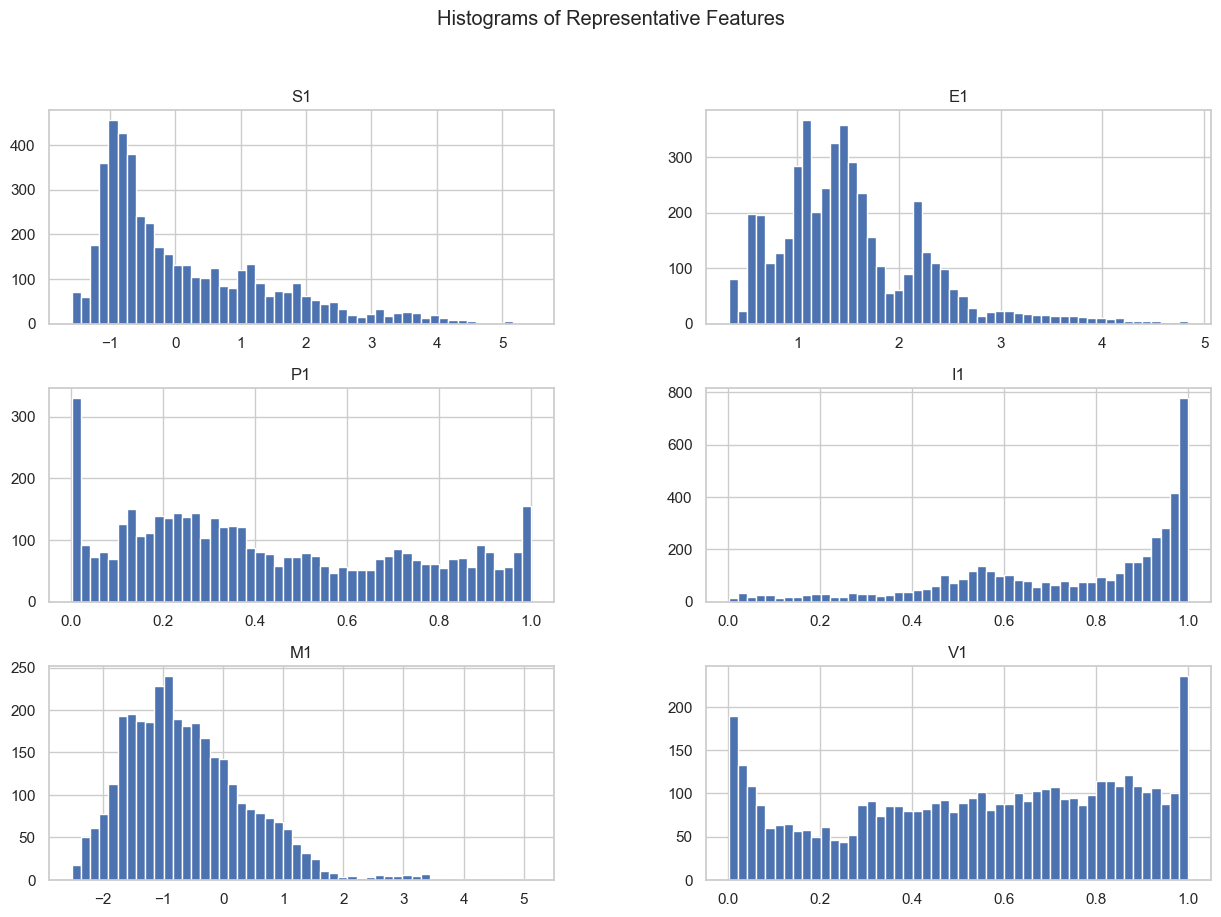

In [7]:
df[cols_to_plot].hist(bins=50, figsize=(15, 10))
plt.suptitle("Histograms of Representative Features")
plt.show()

## 6. Target Variable Analysis

The competition involves predicting a portfolio allocation, but the underlying signal is likely related to `market_forward_excess_returns`.

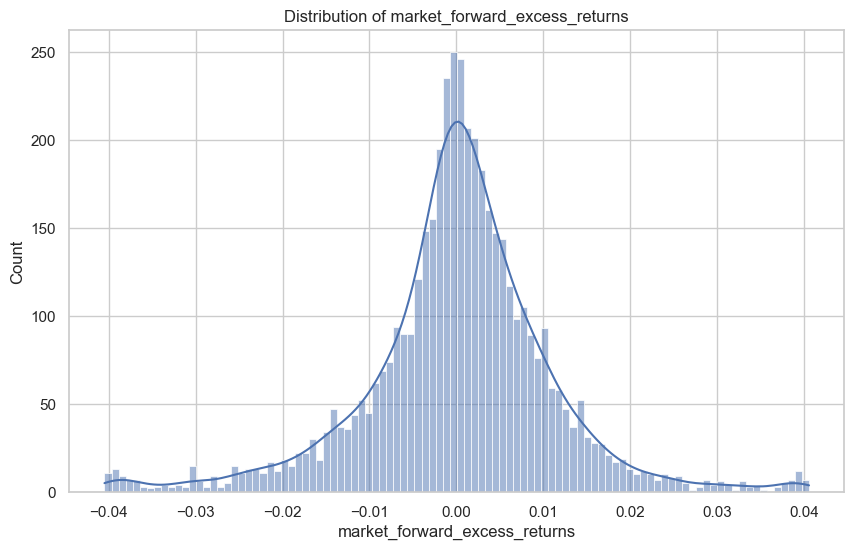

Target Statistics:
count    4625.000000
mean        0.000135
std         0.010994
min        -0.040476
25%        -0.004407
50%         0.000341
75%         0.005584
max         0.040551
Name: market_forward_excess_returns, dtype: float64


In [8]:
target_col = 'market_forward_excess_returns'
if target_col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[target_col].dropna(), bins=100, kde=True)
    plt.title(f"Distribution of {target_col}")
    plt.show()
    
    print("Target Statistics:")
    print(df[target_col].describe())
else:
    print(f"Target column '{target_col}' not found.")

## 7. Comprehensive Correlation Analysis

We analyze the correlation between all numerical features, displaying a dense heatmap of the lower triangle and listing the top 20 correlated pairs.

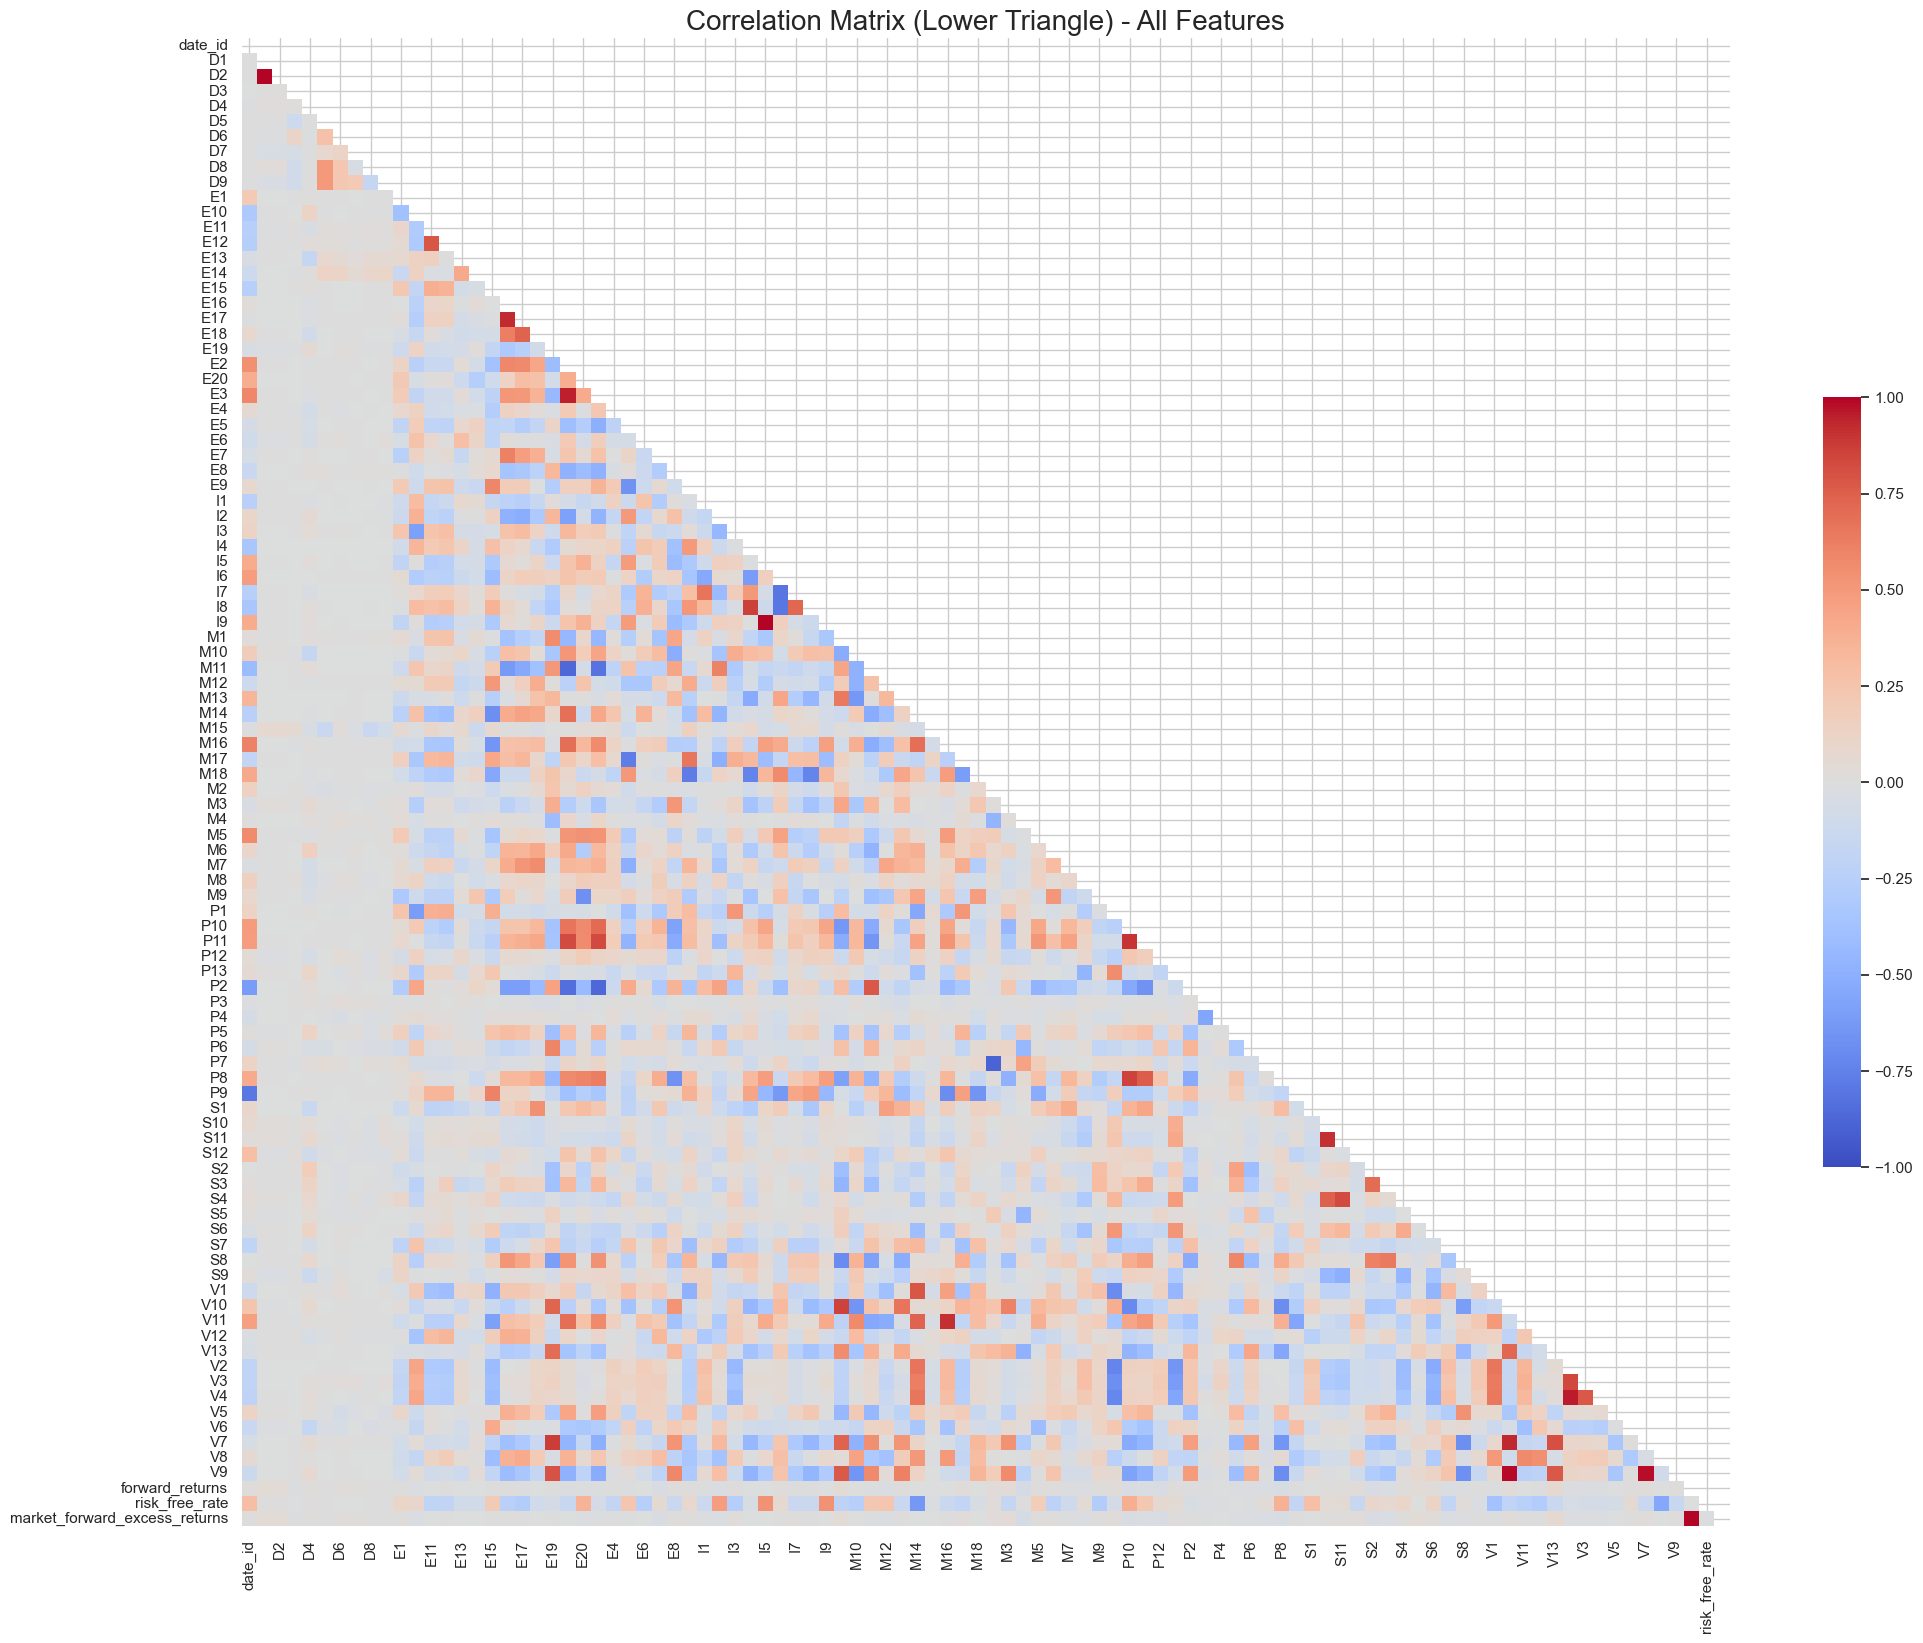

Top 20 Correlated Feature Pairs:
1. D2 - D1: 1.0000
2. market_forward_excess_returns - forward_returns: 1.0000
3. I5 - I9: 0.9996
4. V10 - V9: 0.9854
5. V9 - V7: 0.9785
6. V4 - V2: 0.9533
7. E2 - E3: 0.9513
8. V10 - V7: 0.9360
9. E16 - E17: 0.9226
10. M16 - V11: 0.9099
11. S11 - S10: 0.9065
12. P11 - P10: 0.9060
13. V7 - E19: 0.8676
14. I4 - I8: 0.8613
15. V10 - M1: 0.8560
16. P8 - P10: 0.8557
17. V2 - V3: 0.8369
18. P11 - E3: 0.8332
19. S4 - S11: 0.8273
20. P11 - E2: 0.8259


In [9]:
# Calculate correlation matrix for all numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# 1. Dense Correlation Matrix (Lower Triangle)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(24, 20))  # Increased figure size for readability
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Lower Triangle) - All Features", fontsize=20)
plt.show()

# 2. Top 20 Correlated Pairs
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)

unique_pairs = []
seen = set()

print("Top 20 Correlated Feature Pairs:")
count = 0
for idx, val in sorted_pairs.items():
    f1, f2 = idx
    if f1 == f2:
        continue
    
    pair = tuple(sorted((f1, f2)))
    if pair in seen:
        continue
    
    seen.add(pair)
    print(f"{count+1}. {f1} - {f2}: {val:.4f}")
    unique_pairs.append((f1, f2, val))
    count += 1
    if count >= 20:
        break

## 8. Cross-Category Correlation Analysis

Here we focus exclusively on correlations between features from *different* groups (e.g., Price vs. Economic), filtering out intra-group correlations.

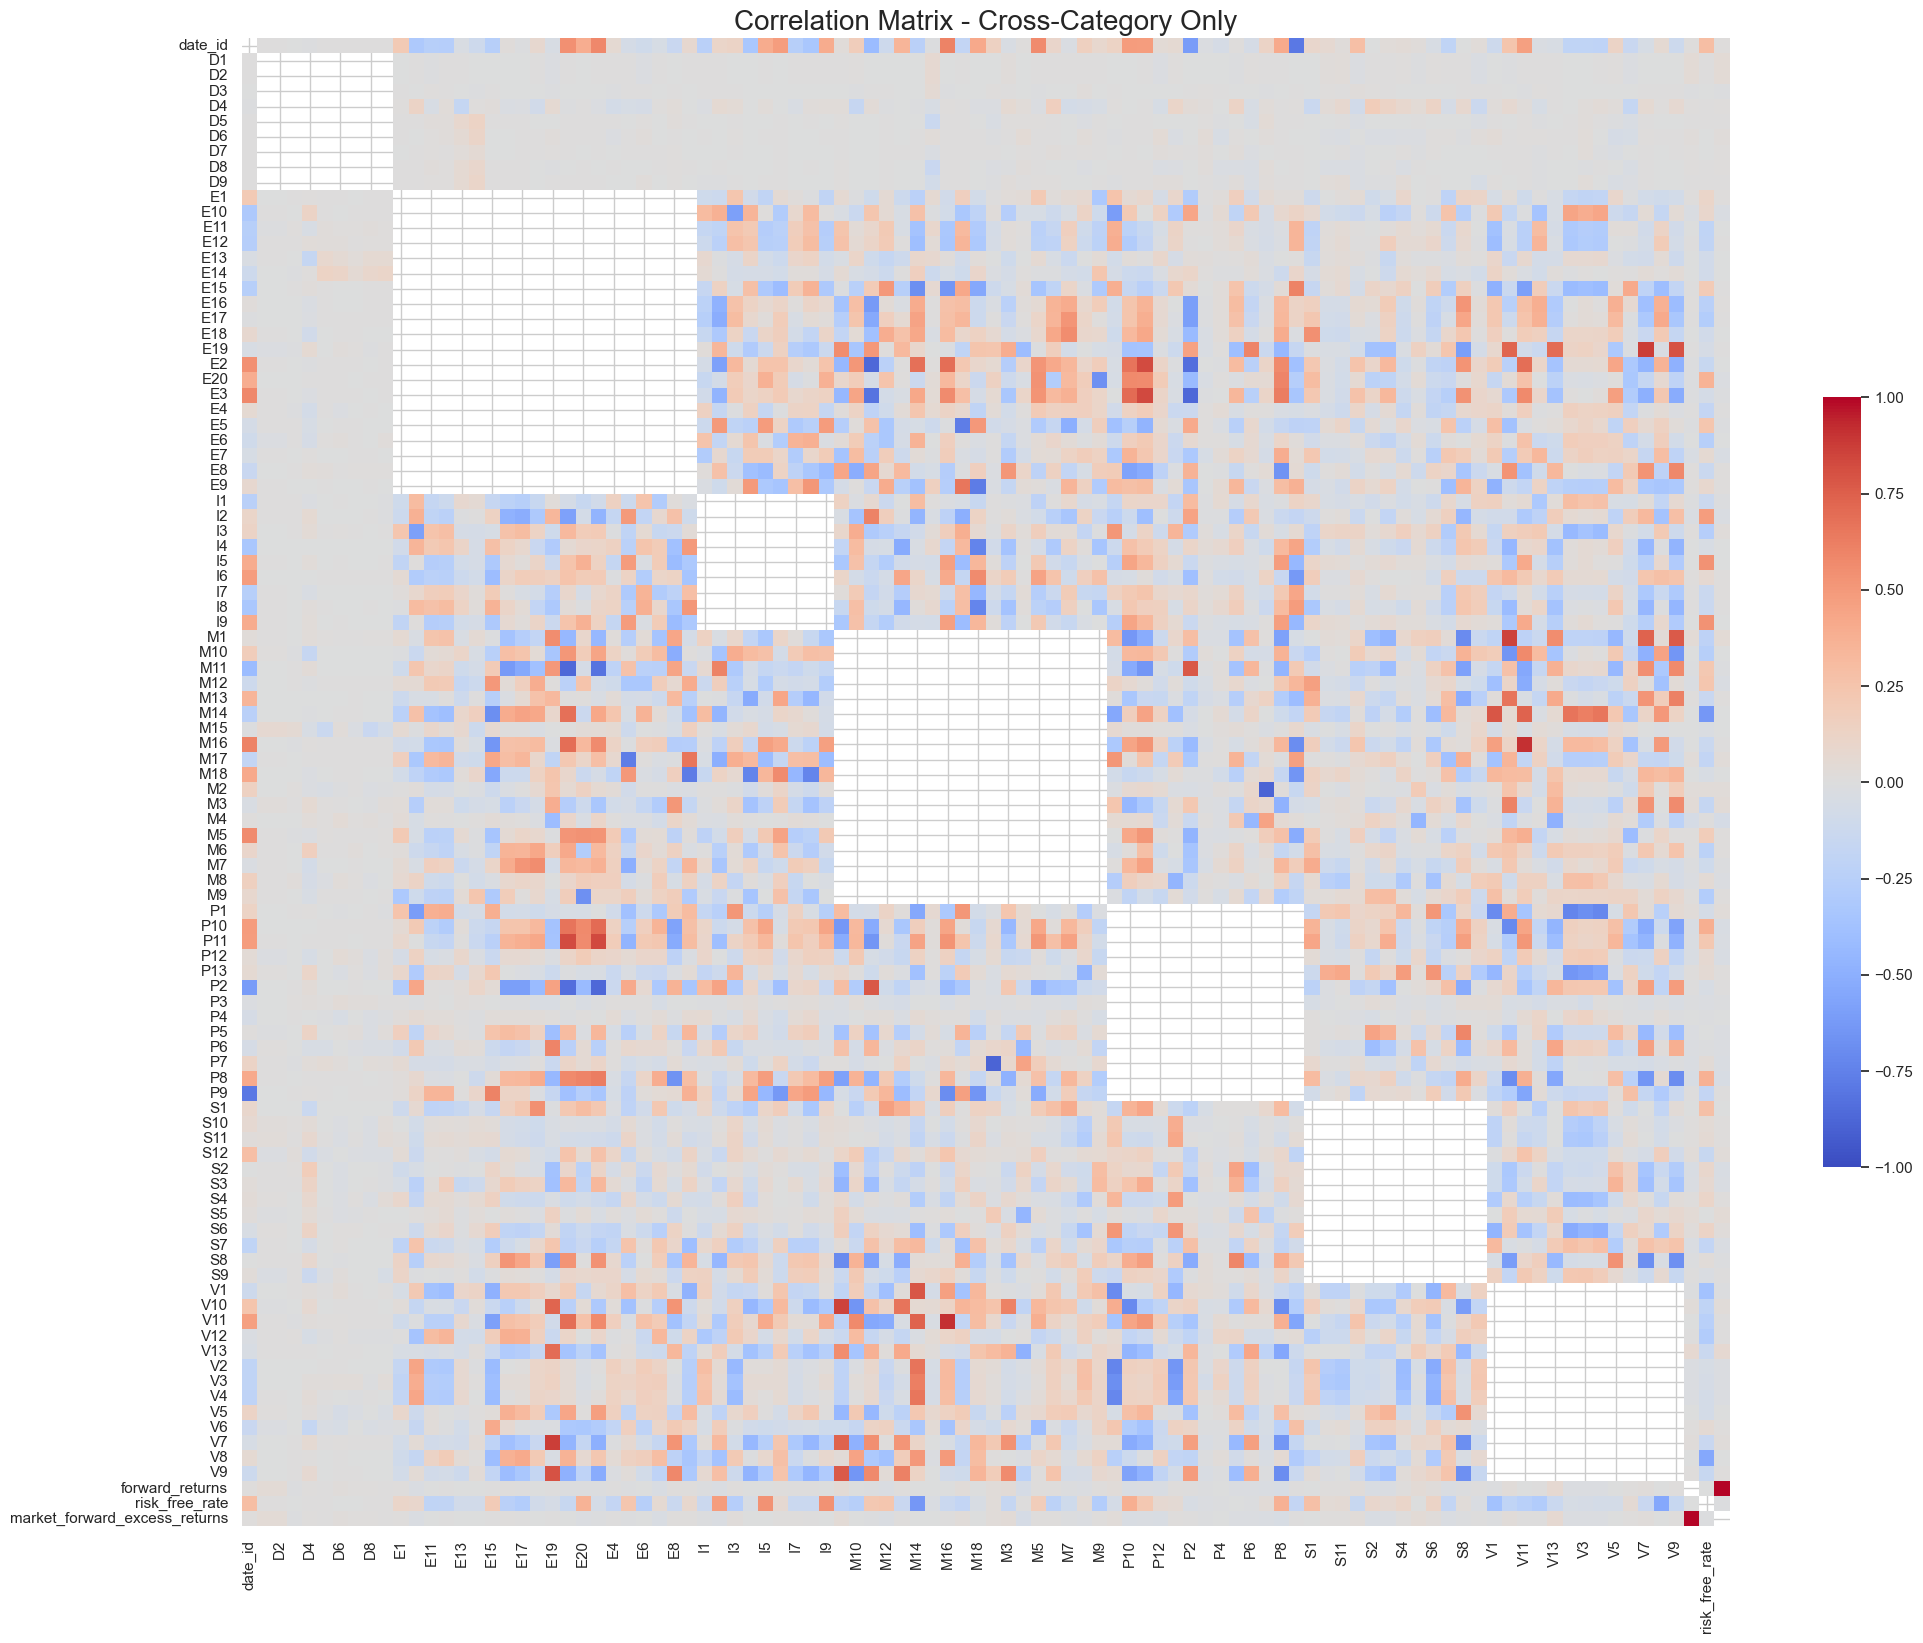

Top 20 Cross-Category Correlated Feature Pairs:
1. market_forward_excess_returns - forward_returns: 1.0000
2. M16 - V11: 0.9099
3. V7 - E19: 0.8676
4. V10 - M1: 0.8560
5. P11 - E3: 0.8332
6. P11 - E2: 0.8259
7. V9 - E19: 0.8019
8. M14 - V1: 0.7882
9. M11 - P2: 0.7759
10. M1 - V9: 0.7671
11. V11 - M14: 0.7385
12. M1 - V7: 0.7364
13. V10 - E19: 0.7292
14. P10 - E3: 0.7068
15. V13 - E19: 0.6997
16. E2 - M16: 0.6936
17. E2 - V11: 0.6882
18. M14 - E2: 0.6860
19. V10 - M13: 0.6692
20. P10 - E2: 0.6690
21. M14 - V2: 0.6687
22. M17 - E9: 0.6607
23. M14 - V4: 0.6596
24. P8 - E3: 0.6289
25. M14 - V3: 0.6210
26. V9 - M13: 0.6119
27. M3 - V10: 0.6079
28. I2 - M11: 0.6037
29. P9 - E15: 0.6031
30. date_id - M16: 0.6030
31. E19 - P6: 0.5999
32. P8 - E20: 0.5984
33. P5 - S8: 0.5915
34. V9 - E8: 0.5828
35. date_id - E3: 0.5800
36. P8 - E2: 0.5764
37. E20 - P10: 0.5752
38. V9 - M11: 0.5739
39. V11 - M10: 0.5729
40. E3 - V11: 0.5714
41. E3 - M16: 0.5675
42. M3 - V9: 0.5653
43. I6 - M18: 0.5647
44. date_i

In [10]:
# Create a mask to hide intra-category correlations
mask_cross = np.zeros_like(corr_matrix, dtype=bool)

for i, col1 in enumerate(corr_matrix.columns):
    for j, col2 in enumerate(corr_matrix.columns):
        if col1[0] == col2[0]:  # Same category prefix
            mask_cross[i, j] = True

# Plot Heatmap of ONLY Cross-Category Correlations
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, mask=mask_cross, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix - Cross-Category Only", fontsize=20)
plt.show()

# List Top 20 Cross-Category Pairs
print("Top 20 Cross-Category Correlated Feature Pairs:")
count = 0
seen_cross = set()

for idx, val in sorted_pairs.items():
    f1, f2 = idx
    if f1 == f2 or f1[0] == f2[0]: # Skip same feature or same category
        continue
    
    pair = tuple(sorted((f1, f2)))
    if pair in seen_cross:
        continue
    
    seen_cross.add(pair)
    print(f"{count+1}. {f1} - {f2}: {val:.4f}")
    count += 1
    if count >= 10000:
        break

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go

# 假设 df 已经加载（如果没有，取消下面的注释）
# df = pd.read_csv('../data/hull-tactical-market-prediction/train.csv')

# 选择数值特征（排除 date_id 和目标变量）
feature_cols = [c for c in df.columns if c not in ['date_id', 'forward_returns', 'market_forward_excess_returns']]

# 由于 t-SNE 计算开销大，我们先采样 2000 个样本
sample_size = min(2000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

# 准备数据：填充 NaN 并标准化
from sklearn.preprocessing import StandardScaler
X = df_sample[feature_cols].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 执行 t-SNE（3D）
print("Running t-SNE (this may take a minute)...")
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42, verbose=1)
X_tsne = tsne.fit_transform(X_scaled)

# 创建可视化数据框
df_viz = pd.DataFrame({
    'tSNE_1': X_tsne[:, 0],
    'tSNE_2': X_tsne[:, 1],
    'tSNE_3': X_tsne[:, 2],
    'Target': df_sample['market_forward_excess_returns'].values,
    'Date_ID': df_sample['date_id'].values
})

# 创建目标变量的分类（正收益 vs 负收益）
df_viz['Target_Sign'] = df_viz['Target'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# 方法1：按目标变量符号着色
fig1 = px.scatter_3d(
    df_viz, 
    x='tSNE_1', y='tSNE_2', z='tSNE_3',
    color='Target_Sign',
    title='t-SNE 3D Visualization (Colored by Return Sign)',
    hover_data=['Target', 'Date_ID'],
    opacity=0.7,
    color_discrete_map={'Positive': '#00CC96', 'Negative': '#EF553B'}
)
fig1.update_traces(marker=dict(size=3))
fig1.show()

# 方法2：按目标变量连续值着色
fig2 = px.scatter_3d(
    df_viz, 
    x='tSNE_1', y='tSNE_2', z='tSNE_3',
    color='Target',
    title='t-SNE 3D Visualization (Colored by Return Magnitude)',
    hover_data=['Date_ID'],
    opacity=0.7,
    color_continuous_scale='RdYlGn'  # 红（负）-> 黄（零）-> 绿（正）
)
fig2.update_traces(marker=dict(size=3))
fig2.show()

# 方法3：按时间着色（看是否有时间聚类）
fig3 = px.scatter_3d(
    df_viz, 
    x='tSNE_1', y='tSNE_2', z='tSNE_3',
    color='Date_ID',
    title='t-SNE 3D Visualization (Colored by Time)',
    hover_data=['Target'],
    opacity=0.7,
    color_continuous_scale='Viridis'
)
fig3.update_traces(marker=dict(size=3))
fig3.show()

print("\n✓ 生成了 3 个 t-SNE 可视化：")
print("  1. 按收益正负着色")
print("  2. 按收益大小着色")
print("  3. 按时间着色")


Running t-SNE (this may take a minute)...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.338s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 3.447118
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.498890
[t-SNE] KL divergence after 1000 iterations: 0.425825



✓ 生成了 3 个 t-SNE 可视化：
  1. 按收益正负着色
  2. 按收益大小着色
  3. 按时间着色
